We worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, it's very common in practice to work with more than one data set at a time.

Often, We'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from mulitiple sources.

In [1]:
import pandas as pd

happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

In [2]:
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017

In [3]:
# subset happiness2015 and happiness2016 to the variables head_2015 and head_2016

head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [6]:
# concatenate head_2015 and 2016 on stacked basis(one over other or at axis = 0)
concat_axis0 = pd.concat([head_2015, head_2016], axis = 0) # by defualt axis = 0
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [8]:
# concatenate head_2015 and 2016 on Side by Side basis(at axis = 1)

concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


When you use the concat() function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together.

However, what happens if the dataframes have different shapes or columns?

In [9]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [10]:
concat_axis0 = pd.concat([head_2015,head_2016])
concat_axis0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

Luckily, the concat function has a parameter, ignore_index, that can be used to clear the existing index and reset it in the result. 

In [11]:
concat_update_index = pd.concat([head_2015,head_2016], ignore_index= True)
concat_update_index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


# pd.merge()

A function that can execute high performance database-style joins

Unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time. However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined

With the merge() function, we'll combine dataframes on a key, a shared index or column. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

Think of keys as creating a link from one dataframe to another using the common values or indexes. 

In [14]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
print(three_2015); print(three_2016)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


In [16]:
# merging on the basis of Country column
pd.merge(left = three_2015, right = three_2016, on = "Country")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


The one country returned in merged was "Norway", the only element that appeared in the Country column in BOTH three_2015 and three_2016.

This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

The term "join" originates from SQL (or structured query language), a language used to work with databases.

There are actually four different types of joins:

1. Inner: only includes elements that appear in both dataframes with a common key
2. Outer: includes all data from both dataframes
3. Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
4. Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

If the definition for outer joins sounds familiar, it's because we've already seen examples of outer joins! Recall that when we combined data using the concat function, it kept all of the data from all dataframes, no matter if missing values were created.

In [17]:
# use a left join 

pd.merge(three_2015, three_2016,how = "left", on = "Country")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [18]:
pd.merge(three_2016, three_2015, on = "Country", how = "left")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In summary, we'd use a left join when we don't want to drop any data from the left dataframe.

Note that a right join works the same as a left join

The merge function added a suffix of either _x or _y to columns of the same name to distinguish between them.

In [21]:
# Update suffixes

suffixes = pd.merge(three_2015, three_2016, on = "Country", how = "left", suffixes = ("_2015","_2016"))
suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


# merge on index basis

To join on the index, we'll set the left_index and right_index parameters to True

In [23]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
# print(four_2015); print(three_2016)

In [26]:
pd.merge(four_2015, three_2016, left_index = True, right_index= True, suffixes = ("_2015","_2016")) # by default inner join

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [27]:
# left merge on the basis of index
pd.merge(left = four_2015, right = three_2016, how = "left", left_index=True, right_index= True, suffixes = ("_2015","_2016"))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


In [30]:
print(happiness2015.columns)
print(happiness2016.columns)
print(happiness2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')


In [39]:
# syncornize the columns name with other df,s columns
happiness2017.rename({'Happiness.Score':'Happiness Score'}, inplace = True)


In [72]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index = True)
combined

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.349510,0.665570,0.296780,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.402230,0.628770,0.436300,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.360580,0.649380,0.341390,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.330950,0.669730,0.346990,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.322610,0.632970,0.458110,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015
5,Finland,2.61955,NaN,1.29025,NaN,1.318260,0.641690,0.233510,6.0,7.406,...,NaN,NaN,Western Europe,0.03140,0.41372,NaN,NaN,NaN,NaN,2015
6,Netherlands,2.46570,NaN,1.32944,NaN,1.280170,0.615760,0.476100,7.0,7.378,...,NaN,NaN,Western Europe,0.02799,0.31814,NaN,NaN,NaN,NaN,2015
7,Sweden,2.37119,NaN,1.33171,NaN,1.289070,0.659800,0.362620,8.0,7.364,...,NaN,NaN,Western Europe,0.03157,0.43844,NaN,NaN,NaN,NaN,2015
8,New Zealand,2.26425,NaN,1.25018,NaN,1.319670,0.639380,0.475010,9.0,7.286,...,NaN,NaN,Australia and New Zealand,0.03371,0.42922,NaN,NaN,NaN,NaN,2015
9,Australia,2.26646,NaN,1.33358,NaN,1.309230,0.651240,0.435620,10.0,7.284,...,NaN,NaN,Australia and New Zealand,0.04083,0.35637,NaN,NaN,NaN,NaN,2015


In [44]:
pivot_table_combined = pd.pivot_table(data = combined,values= "Happiness Score", index = "Year") # by default aggfunc calculate a mean
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [77]:
combined.groupby("Year")["Happiness Score"].agg("mean") # alternate of pivot table method

Year
2015    5.375734
2016    5.382185
2017    5.354019
Name: Happiness Score, dtype: float64

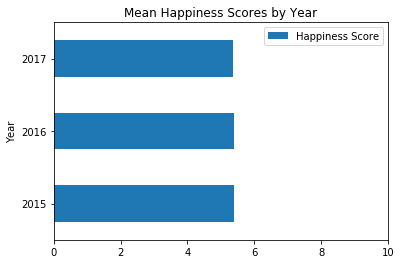

In [48]:
import matplotlib.pyplot as plt
pivot_table_combined.plot(kind = "barh", title = 'Mean Happiness Scores by Year', xlim = (0,10))
plt.show()


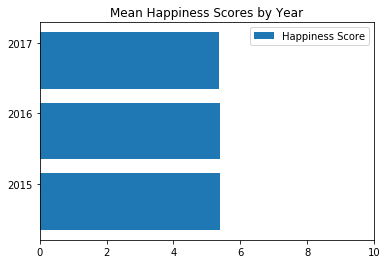

In [71]:
# Alternate method
import numpy as np
fig, ax = plt.subplots()
bottom = np.arange(3) + .75
height = pivot_table_combined["Happiness Score"]
plt.barh(bottom, height, label = "Happiness Score")
plt.yticks(range(1,4))
ax.set_yticklabels([2015,2016,2017])
ax.set_xlim(0,10)
plt.legend()
plt.title('Mean Happiness Scores by Year')
plt.show()


you may happen to work upon the df.append() and df.join() methods, which are basically shortcuts for the concat() and merge() functions. if you want to learn more about them, [check out this documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).